# Machine Learning Task : Predicts The Dialect Given The Text

> Data Pre-processing steps :

1. Importing The Libraries
2. Importing The Dataset
3. Missing Data
4. Clean The Data

  *   Remove Stopwords
  *   Remove Punctuations
  *   Removing URLs
  *   Removing Stop words
  *   Remove White spaces
  *   Removal of emojis
  *   Removal of HTML tags
  *   Most Common Words
  *   Removal of Frequent words

5. Encoding categorical data
6. Vectorizer [ TF / IDF ]
7. Splitting the dataset into the Training set and Test set

> There are some other pre-processing steps that will not be used that we will talk about in documentation the article and why they were not used in the task

> The Algorithms used in the Project : -


    1. Support Vector Machine [ SVM ]
    2. Naive Bayes

> Then we will compare them in terms of the highest efficiency we will talk about in documentation

> Evaluation Classification Methods Performance : - [ Metrics Model ]


1.   Confusion Matrix
2.   Classification Report
     * Recall 
     * Precision    
     * F1_Score


> Importing The Libraries

In [11]:
! pip install PyArabic
! pip install emoji
! pip install Arabic_Stopwords


In [12]:
import requests
import json

import re
import nltk , re, string, random
import emoji
from nltk.tokenize import word_tokenize
from bs4 import BeautifulSoup
import nltk
nltk.download('punkt')

from nltk import FreqDist, classify, NaiveBayesClassifier,DecisionTreeClassifier 
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
from collections import Counter
import matplotlib.pyplot as plt
import arabicstopwords.arabicstopwords as stp
from nltk.tokenize.treebank import TreebankWordDetokenizer
from pyarabic.araby import tokenize, is_arabicrange, strip_tashkeel, normalize_hamza, strip_tatweel

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split


from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import pickle
from sklearn.datasets import load_files

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [13]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [14]:
URL = "https://recruitment.aimtechnologies.co/ai-tasks"
file_name = 'C://Users//Abdo//Desktop//Task//dialect_dataset.csv'
chunksize = 1000

In [15]:
def get_response(file_name, chunksize):
    COUNT=1
    Final_df = pd.DataFrame(columns=['id','text','dialect'], dtype=object)
    for chunk in pd.read_csv(file_name, chunksize=chunksize, dtype={"id":"str"}):
        print(f'You are in number {COUNT} batch ')
        
        # defining a params dict for the parameters to be sent to the API
        data_ids = json.dumps(list(chunk['id']))

        # sending get request and saving the response as response object
        response = requests.post(URL,data=data_ids)

        # extracting data in json format
        data_json = response.json()

        # convert to data frame to continue pre-processing
        df = pd.DataFrame(data_json.items(),columns=['id','text'])
        
        # merging the respons dataframe with the orignal dataframe
        merged_inner = pd.merge(left=df, right=chunk, left_on='id', right_on='id')
        
        Final_df = pd.concat([Final_df,merged_inner])
        
        COUNT+=1

                    
    return Final_df
    
df = get_response(file_name, chunksize)

You are in number 1 batch 
You are in number 2 batch 
You are in number 3 batch 
You are in number 4 batch 
You are in number 5 batch 
You are in number 6 batch 
You are in number 7 batch 
You are in number 8 batch 
You are in number 9 batch 
You are in number 10 batch 
You are in number 11 batch 
You are in number 12 batch 
You are in number 13 batch 
You are in number 14 batch 
You are in number 15 batch 
You are in number 16 batch 
You are in number 17 batch 
You are in number 18 batch 
You are in number 19 batch 
You are in number 20 batch 
You are in number 21 batch 
You are in number 22 batch 
You are in number 23 batch 
You are in number 24 batch 
You are in number 25 batch 
You are in number 26 batch 
You are in number 27 batch 
You are in number 28 batch 
You are in number 29 batch 
You are in number 30 batch 
You are in number 31 batch 
You are in number 32 batch 
You are in number 33 batch 
You are in number 34 batch 
You are in number 35 batch 
You are in number 36 batch 
Y

> Importing The Dataset

In [16]:
print('Dataset: ',df.head(10))
print('*******************************************************')
print('Dataset Shape: ',df.shape)
print('*******************************************************')
print(df.columns)
print('*******************************************************')

Dataset:                      id                                               text  \
0  1175358310087892992   @Nw8ieJUwaCAAreT لكن بالنهاية .. ينتفض .. يغير .   
1  1175416117793349632  @7zNqXP0yrODdRjK يعني هذا محسوب على البشر .. ح...   
2  1175450108898565888                    @KanaanRema مبين من كلامه خليجي   
3  1175471073770573824         @HAIDER76128900 يسلملي مرورك وروحك الحلوه💐   
4  1175496913145217024                 @hmo2406 وين هل الغيبه  اخ محمد 🌸🌺   
5  1175668034146643968  @Badi9595 @KanaanRema يااخي الإرهابي اذا كان ع...   
6  1175670153884983296  @SarahNadhum90 @nUBNTdfVgACYQxV مطلبي يقدم است...   
7  1175671762580856832  @KanaanRema @Badi9595 خلص والله لعيونكم انا ما...   
8  1175715664398561280  @SalahAlarbawi يمكن سؤال فات الكثير اللي يصور ...   
9  1176019816072777728  @Eng_alow91 @cb4LwpWrS1hT5lb @EdyCohen اولا ان...   

  dialect  
0      IQ  
1      IQ  
2      IQ  
3      IQ  
4      IQ  
5      IQ  
6      IQ  
7      IQ  
8      IQ  
9      IQ  
**********

> Delete Unless Columns

In [17]:
df.drop(['id'],axis=1,inplace=True)
df.columns

Index(['text', 'dialect'], dtype='object')

> Show Data

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


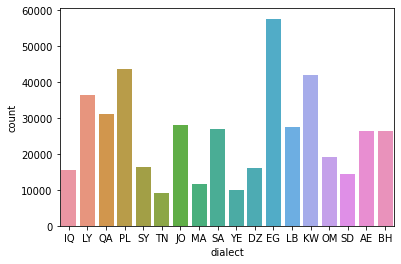

In [18]:
types = df.dialect
ax=sns.countplot(types,data = df ,label='Count')

In [19]:
types = df['dialect'].value_counts()[:18]
a = pd.DataFrame(types)
a

,dialect
EG,57636
PL,43742
KW,42109
LY,36499
QA,31069
JO,27921
LB,27617
SA,26832
AE,26296
BH,26292


> Missing Data

In [20]:
df.isnull().sum()

text       0
dialect    0
dtype: int64

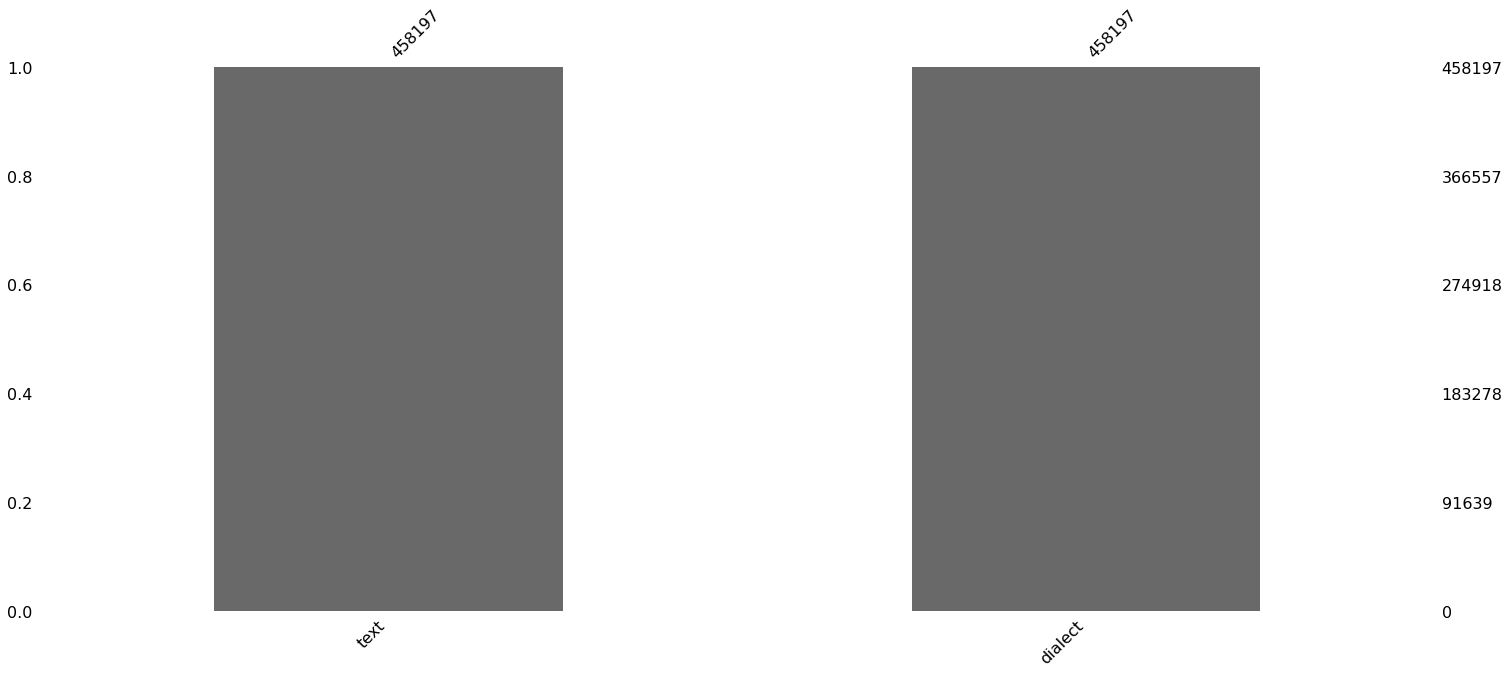

In [21]:
msno.bar(df)


> Clean The Data
  1. Remove Stopwords
  2. Remove Punctuations
  3. Removing URLs
  4. Removing Stop words
  5. Remove White spaces
  6. Removal of emojis
  7. Remove_repeating_char
  8. Removal of HTML tags
  9. Most Mommon Words

In [22]:
# Stopwords
len(stp.classed_stopwords_list())

507

In [23]:
stp.classed_stopwords_list()

dict_keys(['حم', 'غداة', 'جنوب', 'ذواتا', 'حي', 'لازلنا', 'زمان', 'عوض', 'بنا', 'أجمع', 'ؤ', 'إيه', 'لدن', 'ها', 'ش', 'غرب', 'لازلتم', 'هج', 'هب', 'عسى', 'ل', 'آنفا', 'لازلتن', 'هن', 'هم', 'هل', 'هاؤم', 'ارتد', 'هي', 'هو', 'لازالتا', 'تلكما', 'وقت', 'أولئكم', 'نحو', 'حسب', 'نحن', 'لئن', 'اللذين', 'أب', 'أخ', 'قبل', 'بدون', 'مادامتا', 'بئس', 'د', 'ذا', 'لعمر', 'هاهنا', 'كما', 'لستم', 'لستن', 'حتى', 'لدى', 'ذه', 'ذي', 'ذو', 'أي', 'أو', 'أف', 'أن', 'أم', 'نعما', 'هيت', 'هيا', 'مابرح', 'حينما', 'هلا', 'إنما', 'جعل', 'كخ', 'ت', 'عما', 'بكن', 'بكم', 'مازلنا', 'غ', 'رويدك', 'دون', 'أولئك', 'كي', 'هؤلاء', 'لها', 'ي', 'مكانكما', 'كم', 'كل', 'مافتئتن', 'ماانفككتما', 'لعل', 'إنا', 'لازال', 'متى', 'مابرحوا', 'خلال', 'مازلتن', 'مازلتم', 'ثنا', 'راح', 'هلم', 'لولا', 'مابرحتما', 'مافتئت', 'مافتئتم', 'تان', 'مرة', 'أصلا', 'وشكان', 'كأنما', 'إياهما', 'أسفل', 'ص', 'أمامك', 'م', 'مادمتما', 'إياهم', 'ماانفكوا', 'استحال', 'إليك', 'أمسى', 'انبرى', 'مافتئتا', 'أنتم', 'لازالوا', 'أنتن', 'ليستا', 'ماانفككن', '

In [24]:
def clean_text(tweet):
    # Remove Stopwords
    STOPWORDS = stp.classed_STOPWORDS 
    #remove links and mentions
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','',tweet) 
    tweet = re.sub('@[^\s]+','',tweet)   
    #remove  digits and Punctuations
    tweet = re.sub('\@|\)|\(|\.|\d|\!|\#|\$|\[|\]|\%|\&|\*|\~|\,|\;|\،|\'|\"|\,|\+|\-|\:|\<|\>|\=|\?|\؟|\_|\|','',tweet)  
    #remove english words
    tweet = re.sub(r"[a-zA-Z]", '', tweet)
    #remove emoji
    tweet = re.sub(emoji.get_emoji_regexp(), r"", tweet) 
    tweet = word_tokenize(tweet)
    tweet = " ".join(word for word in tweet if word not in STOPWORDS)
    return tweet

In [25]:
df['text'] = df['text'].apply(clean_text)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: 'emoji.get_emoji_regexp()' is deprecated and will be removed in version 2.0.0. If you want to remove emoji from a string, consider the method emoji.replace_emoji(str, replace='').
To hide this warning, pin/downgrade the package to 'emoji~=1.6.3'
  if sys.path[0] == '':


In [26]:
# https://github.com/NeelShah18/emot/blob/master/emot/emo_unicode.py

EMOTICONS = {
    u":‑\)":"Happy face or smiley",
    u":\)":"Happy face or smiley",
    u":-\]":"Happy face or smiley",
    u":\]":"Happy face or smiley",
    u":-3":"Happy face smiley",
    u":3":"Happy face smiley",
    u":->":"Happy face smiley",
    u":>":"Happy face smiley",
    u"8-\)":"Happy face smiley",
    u":o\)":"Happy face smiley",
    u":-\}":"Happy face smiley",
    u":\}":"Happy face smiley",
    u":-\)":"Happy face smiley",
    u":c\)":"Happy face smiley",
    u":\^\)":"Happy face smiley",
    u"=\]":"Happy face smiley",
    u"=\)":"Happy face smiley",
    u":‑D":"Laughing, big grin or laugh with glasses",
    u":D":"Laughing, big grin or laugh with glasses",
    u"8‑D":"Laughing, big grin or laugh with glasses",
    u"8D":"Laughing, big grin or laugh with glasses",
    u"X‑D":"Laughing, big grin or laugh with glasses",
    u"XD":"Laughing, big grin or laugh with glasses",
    u"=D":"Laughing, big grin or laugh with glasses",
    u"=3":"Laughing, big grin or laugh with glasses",
    u"B\^D":"Laughing, big grin or laugh with glasses",
    u":-\)\)":"Very happy",
    u":‑\(":"Frown, sad, andry or pouting",
    u":-\(":"Frown, sad, andry or pouting",
    u":\(":"Frown, sad, andry or pouting",
    u":‑c":"Frown, sad, andry or pouting",
    u":c":"Frown, sad, andry or pouting",
    u":‑<":"Frown, sad, andry or pouting",
    u":<":"Frown, sad, andry or pouting",
    u":‑\[":"Frown, sad, andry or pouting",
    u":\[":"Frown, sad, andry or pouting",
    u":-\|\|":"Frown, sad, andry or pouting",
    u">:\[":"Frown, sad, andry or pouting",
    u":\{":"Frown, sad, andry or pouting",
    u":@":"Frown, sad, andry or pouting",
    u">:\(":"Frown, sad, andry or pouting",
    u":'‑\(":"Crying",
    u":'\(":"Crying",
    u":'‑\)":"Tears of happiness",
    u":'\)":"Tears of happiness",
    u"D‑':":"Horror",
    u"D:<":"Disgust",
    u"D:":"Sadness",
    u"D8":"Great dismay",
    u"D;":"Great dismay",
    u"D=":"Great dismay",
    u"DX":"Great dismay",
    u":‑O":"Surprise",
    u":O":"Surprise",
    u":‑o":"Surprise",
    u":o":"Surprise",
    u":-0":"Shock",
    u"8‑0":"Yawn",
    u">:O":"Yawn",
    u":-\*":"Kiss",
    u":\*":"Kiss",
    u":X":"Kiss",
    u";‑\)":"Wink or smirk",
    u";\)":"Wink or smirk",
    u"\*-\)":"Wink or smirk",
    u"\*\)":"Wink or smirk",
    u";‑\]":"Wink or smirk",
    u";\]":"Wink or smirk",
    u";\^\)":"Wink or smirk",
    u":‑,":"Wink or smirk",
    u";D":"Wink or smirk",
    u":‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"X‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"XP":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"d:":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"=p":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u">:P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":-[.]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":S":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":‑\|":"Straight face",
    u":\|":"Straight face",
    u":$":"Embarrassed or blushing",
    u":‑x":"Sealed lips or wearing braces or tongue-tied",
    u":x":"Sealed lips or wearing braces or tongue-tied",
    u":‑#":"Sealed lips or wearing braces or tongue-tied",
    u":#":"Sealed lips or wearing braces or tongue-tied",
    u":‑&":"Sealed lips or wearing braces or tongue-tied",
    u":&":"Sealed lips or wearing braces or tongue-tied",
    u"O:‑\)":"Angel, saint or innocent",
    u"O:\)":"Angel, saint or innocent",
    u"0:‑3":"Angel, saint or innocent",
    u"0:3":"Angel, saint or innocent",
    u"0:‑\)":"Angel, saint or innocent",
    u"0:\)":"Angel, saint or innocent",
    u":‑b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"0;\^\)":"Angel, saint or innocent",
    u">:‑\)":"Evil or devilish",
    u">:\)":"Evil or devilish",
    u"\}:‑\)":"Evil or devilish",
    u"\}:\)":"Evil or devilish",
    u"3:‑\)":"Evil or devilish",
    u"3:\)":"Evil or devilish",
    u">;\)":"Evil or devilish",
    u"\|;‑\)":"Cool",
    u"\|‑O":"Bored",
    u":‑J":"Tongue-in-cheek",
    u"#‑\)":"Party all night",
    u"%‑\)":"Drunk or confused",
    u"%\)":"Drunk or confused",
    u":-###..":"Being sick",
    u":###..":"Being sick",
    u"<:‑\|":"Dump",
    u"\(>_<\)":"Troubled",
    u"\(>_<\)>":"Troubled",
    u"\(';'\)":"Baby",
    u"\(\^\^>``":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(\^_\^;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(-_-;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(~_~;\) \(・\.・;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(-_-\)zzz":"Sleeping",
    u"\(\^_-\)":"Wink",
    u"\(\(\+_\+\)\)":"Confused",
    u"\(\+o\+\)":"Confused",
    u"\(o\|o\)":"Ultraman",
    u"\^_\^":"Joyful",
    u"\(\^_\^\)/":"Joyful",
    u"\(\^O\^\)／":"Joyful",
    u"\(\^o\^\)／":"Joyful",
    u"\(__\)":"Kowtow as a sign of respect, or dogeza for apology",
    u"_\(\._\.\)_":"Kowtow as a sign of respect, or dogeza for apology",
    u"<\(_ _\)>":"Kowtow as a sign of respect, or dogeza for apology",
    u"<m\(__\)m>":"Kowtow as a sign of respect, or dogeza for apology",
    u"m\(__\)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"m\(_ _\)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"\('_'\)":"Sad or Crying",
    u"\(/_;\)":"Sad or Crying",
    u"\(T_T\) \(;_;\)":"Sad or Crying",
    u"\(;_;":"Sad of Crying",
    u"\(;_:\)":"Sad or Crying",
    u"\(;O;\)":"Sad or Crying",
    u"\(:_;\)":"Sad or Crying",
    u"\(ToT\)":"Sad or Crying",
    u";_;":"Sad or Crying",
    u";-;":"Sad or Crying",
    u";n;":"Sad or Crying",
    u";;":"Sad or Crying",
    u"Q\.Q":"Sad or Crying",
    u"T\.T":"Sad or Crying",
    u"QQ":"Sad or Crying",
    u"Q_Q":"Sad or Crying",
    u"\(-\.-\)":"Shame",
    u"\(-_-\)":"Shame",
    u"\(一一\)":"Shame",
    u"\(；一_一\)":"Shame",
    u"\(=_=\)":"Tired",
    u"\(=\^\·\^=\)":"cat",
    u"\(=\^\·\·\^=\)":"cat",
    u"=_\^=	":"cat",
    u"\(\.\.\)":"Looking down",
    u"\(\._\.\)":"Looking down",
    u"\^m\^":"Giggling with hand covering mouth",
    u"\(\・\・?":"Confusion",
    u"\(?_?\)":"Confusion",
    u">\^_\^<":"Normal Laugh",
    u"<\^!\^>":"Normal Laugh",
    u"\^/\^":"Normal Laugh",
    u"\（\*\^_\^\*）" :"Normal Laugh",
    u"\(\^<\^\) \(\^\.\^\)":"Normal Laugh",
    u"\(^\^\)":"Normal Laugh",
    u"\(\^\.\^\)":"Normal Laugh",
    u"\(\^_\^\.\)":"Normal Laugh",
    u"\(\^_\^\)":"Normal Laugh",
    u"\(\^\^\)":"Normal Laugh",
    u"\(\^J\^\)":"Normal Laugh",
    u"\(\*\^\.\^\*\)":"Normal Laugh",
    u"\(\^—\^\）":"Normal Laugh",
    u"\(#\^\.\^#\)":"Normal Laugh",
    u"\（\^—\^\）":"Waving",
    u"\(;_;\)/~~~":"Waving",
    u"\(\^\.\^\)/~~~":"Waving",
    u"\(-_-\)/~~~ \($\·\·\)/~~~":"Waving",
    u"\(T_T\)/~~~":"Waving",
    u"\(ToT\)/~~~":"Waving",
    u"\(\*\^0\^\*\)":"Excited",
    u"\(\*_\*\)":"Amazed",
    u"\(\*_\*;":"Amazed",
    u"\(\+_\+\) \(@_@\)":"Amazed",
    u"\(\*\^\^\)v":"Laughing,Cheerful",
    u"\(\^_\^\)v":"Laughing,Cheerful",
    u"\(\(d[-_-]b\)\)":"Headphones,Listening to music",
    u'\(-"-\)':"Worried",
    u"\(ーー;\)":"Worried",
    u"\(\^0_0\^\)":"Eyeglasses",
    u"\(\＾ｖ\＾\)":"Happy",
    u"\(\＾ｕ\＾\)":"Happy",
    u"\(\^\)o\(\^\)":"Happy",
    u"\(\^O\^\)":"Happy",
    u"\(\^o\^\)":"Happy",
    u"\)\^o\^\(":"Happy",
    u":O o_O":"Surprised",
    u"o_0":"Surprised",
    u"o\.O":"Surpised",
    u"\(o\.o\)":"Surprised",
    u"oO":"Surprised",
    u"\(\*￣m￣\)":"Dissatisfied",
    u"\(‘A`\)":"Snubbed or Deflated"
}

In [27]:
def remove_emoticons(text):
    emoticon_pattern = re.compile(u'(' + u'|'.join(k for k in EMOTICONS) + u')')
    return emoticon_pattern.sub(r'', text)

In [28]:
df['text'] = df['text'].apply(remove_emoticons)

In [29]:
def normalizeArabic_and_remove_repeating_char(text):
    text = re.sub("[إأٱآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ؤ", "ء", text)
    text = re.sub("ئ", "ء", text)
    text = re.sub(r'(.)\1+', r'\1', text)
    return text

In [30]:
df['text'] = df['text'].apply(normalizeArabic_and_remove_repeating_char)

In [31]:
from collections import Counter
cnt = Counter()
for text in df["text"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(25)

[('الي', 78808),
 ('اله', 49879),
 ('يا', 43646),
 ('انا', 31080),
 ('مش', 30748),
 ('ولا', 27007),
 ('واله', 24720),
 ('ه', 21117),
 ('شي', 19453),
 ('انت', 17176),
 ('ان', 16096),
 ('يعني', 13827),
 ('فيه', 13339),
 ('عشان', 13333),
 ('الناس', 13265),
 ('واحد', 12243),
 ('مو', 11910),
 ('علي', 11682),
 ('اذا', 11422),
 ('او', 11312),
 ('انه', 11096),
 ('اي', 10948),
 ('ده', 10522),
 ('فيها', 9770),
 ('يوم', 9764)]

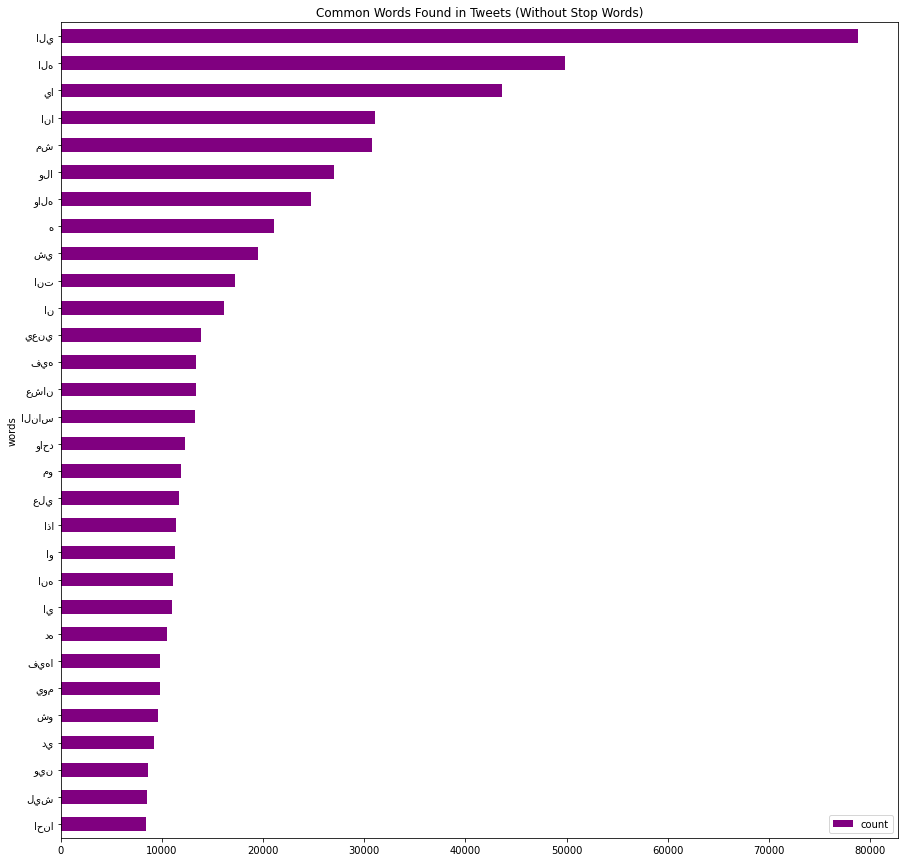

In [32]:
clean_tweets_nsw = pd.DataFrame(cnt.most_common(30),
                             columns=['words', 'count'])
fig, ax = plt.subplots(figsize=(15, 15))

# Plot horizontal bar graph
clean_tweets_nsw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Without Stop Words)")

plt.show()

In [33]:
FREQWORDS = set([w for (w, wc) in cnt.most_common(25)])
def remove_freqwords(text):
    """custom function to remove the frequent words"""
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])

df["text"] = df["text"].apply(lambda text: remove_freqwords(text))
df.head()

,text,dialect
0,بالنهاية ينتفض يغير,IQ
1,محسوب البشر حيونه وحشيه وتطلبون الغرب يحترمكم ...,IQ
2,مبين كلامه خليجي,IQ
3,يسلملي مرورك وروحك الحلوه,IQ
4,وين الغيبه اخ محمد,IQ


In [34]:
def arabic(text):
    text = tokenize(text, conditions=is_arabicrange, morphs=[strip_tashkeel,strip_tatweel])
    return text

In [35]:
df['text'] = df['text'].apply(arabic)

In [36]:
df

,text,dialect
0,"[بالنهاية, ينتفض, يغير]",IQ
1,"[محسوب, البشر, حيونه, وحشيه, وتطلبون, الغرب, ي...",IQ
2,"[مبين, كلامه, خليجي]",IQ
3,"[يسلملي, مرورك, وروحك, الحلوه]",IQ
4,"[وين, الغيبه, اخ, محمد]",IQ
...,...,...
192,"[مبسوطين, منك, باسطانا]",BH
193,"[ماينده, ابش, يختي]",BH
194,"[شو, عملنا, حنا, تهربي, منا, احنا, مساكين, ليش...",BH
195,"[يبارك, وبالعافيه]",BH


In [37]:
def Detokenizer(text):
    text = TreebankWordDetokenizer().detokenize(text)
    return text

In [38]:
df['text'] = df['text'].apply(Detokenizer)

In [39]:
y = df['dialect']

> Vectorizer [TF/IDF]

In [40]:
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    ngram_range=(1, 1),
    max_features =10000)

unigramdataGet= word_vectorizer.fit_transform(df['text'].astype('str'))
print(unigramdataGet)

  (0, 9819)	0.675698170395019
  (0, 2721)	0.7371783926057681
  (1, 1760)	0.579059432143673
  (1, 889)	0.49413974016474366
  (1, 7505)	0.6484721206307692
  (2, 4602)	0.6254042152811486
  (2, 6845)	0.5303011769613248
  (2, 7403)	0.5724073979448592
  (3, 1171)	0.6462791622238495
  (3, 9685)	0.7631010709435804
  (4, 7516)	0.5531202747305624
  (4, 180)	0.6962110420189347
  (4, 9308)	0.4575457864005484
  (5, 2117)	0.27708144712332017
  (5, 1623)	0.25183278120766417
  (5, 36)	0.17541994019458462
  (5, 1678)	0.20409498360320363
  (5, 7686)	0.2214416032053061
  (5, 4579)	0.2247876361013865
  (5, 6189)	0.20094083777005267
  (5, 9632)	0.24264559475227013
  (5, 4959)	0.2693121794620969
  (5, 2589)	0.21064470307717373
  (5, 2080)	0.19594218751196932
  (5, 6457)	0.26628797297063567
  :	:
  (458188, 9487)	0.43335934405566906
  (458188, 2589)	0.33837926658889067
  (458189, 7434)	1.0
  (458190, 6500)	0.5099141906250313
  (458190, 6230)	0.4906749194840578
  (458190, 246)	0.461852867527371
  (458190, 461

> Encoding categorical data

In [41]:
le = LabelEncoder()
y = le.fit_transform(y)

In [42]:
X=unigramdataGet

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=22)
print('X_Train')
print(X_train[:3,:])
print('****************************')
print('X_test')
print(X_test[:3,:])
print(X_test.shape)
print('****************************')
print('Y_train')
print(y_train[:3,])
print('****************************')
print('Y_test')
print(y_test[:3,])

X_Train
  (0, 6948)	1.0
  (1, 4339)	0.4731994117259602
  (1, 8105)	0.5235237318514677
  (1, 2252)	0.43048081551599654
  (1, 5546)	0.43588738990867015
  (1, 6519)	0.3559405423969114
  (2, 9734)	0.44965268860607666
  (2, 3954)	0.4519882237093354
  (2, 7323)	0.4381062895128403
  (2, 8832)	0.30730810216366494
  (2, 6136)	0.3193235420833846
  (2, 8268)	0.2949184288946934
  (2, 7711)	0.3438012659384356
****************************
X_test
  (0, 9696)	0.6876415150342708
  (0, 8428)	0.7260503748372924
  (1, 3718)	0.3414738243027814
  (1, 2664)	0.337664928394079
  (1, 3804)	0.33488529129586375
  (1, 9468)	0.2629241607790076
  (1, 9252)	0.28674752925223906
  (1, 9705)	0.47560412760689696
  (1, 9859)	0.20669414602648012
  (1, 7966)	0.2095031464504915
  (1, 524)	0.290026448930847
  (1, 6185)	0.3300726277931926
  (2, 6237)	0.3424849551313931
  (2, 666)	0.37060952423470767
  (2, 382)	0.37967115185791084
  (2, 610)	0.24371606267999665
  (2, 1743)	0.27850537829131344
  (2, 754)	0.33363469318998457
  (2

In [44]:
from sklearn.naive_bayes import ComplementNB
NB=ComplementNB()
NB.fit(X_train , y_train)
print('Naive Bayse Train Score',NB.score(X_train,y_train))

Naive Bayse Train Score 0.45366477791994153


In [45]:
NB.fit(X_test,y_test)
print('Naive Bayse Test Score',NB.score(X_test,y_test))

Naive Bayse Test Score 0.5145242252291575


In [46]:
#Calculating Prediction
y_pred_NB = NB.predict(X_test)
y_pred_prob = NB.predict_proba(X_test)
y_pred_prob=y_pred_prob.astype(int)
print('Y Test \n' ,y_test[:10,])
print('Predicted Value is :\n ' , y_pred_NB[:10,])
print('Prediction Probabilities Value is : \n' , y_pred_prob[:10,:])

Y Test 
 [ 4  6  1  8  6 17  5  8 11 11]
Predicted Value is :
  [ 0  6  1  6 13  1  5 13 11  5]
Prediction Probabilities Value is : 
 [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [47]:
from sklearn.metrics import accuracy_score
accuracy_NB=accuracy_score(y_test,y_pred_NB)
print(accuracy_NB)

0.5145242252291575


In [48]:
from sklearn.metrics import confusion_matrix
cm_NB=confusion_matrix(y_test,y_pred_NB)
print(cm_NB)

[[2180  234   81  362   75   81  737  112  177   32  132  163  529  235
    36   30   15   27]
 [ 364 1711   70  317  151   82  979  118  256   45  118  211  515  268
    48   47   21   24]
 [ 108   52 1508  385   39   39   87  122  237  198   37  156   65   90
    27   22   41   11]
 [ 208   85   56 9888   45   53  155  124  223   46   50  294   98   82
    97   39   25   12]
 [ 157  106   46  209 1501   53  375   85  105   18   63  130  131   84
    25   31   16   14]
 [ 184  128   90  586   84 1530  286  496  164   48   95 1376  193  167
    52   73   22   15]
 [ 405  292   79  463  177  129 5097  129  272   41  103  226  529  345
    34   53   27   25]
 [ 141   43   51  393   37   96  101 3597  110   27   34  496   84   60
    30   70   22   13]
 [ 271  121  178  731   39   76  230  167 4397  118   80  271  171  152
    62   46   65   13]
 [  75   33  128  265   17   17   57   43  120 1311   17   92   50   55
    30   15   29    5]
 [ 332  200   79  288   73   87  476  114  212   4

In [49]:
from sklearn.metrics import classification_report
cr_NB=classification_report(y_test,y_pred_NB)
print(cr_NB)

              precision    recall  f1-score   support

           0       0.38      0.42      0.40      5238
           1       0.44      0.32      0.37      5345
           2       0.54      0.47      0.50      3224
           3       0.56      0.85      0.68     11580
           4       0.58      0.48      0.52      3149
           5       0.53      0.27      0.36      5589
           6       0.47      0.60      0.53      8426
           7       0.52      0.67      0.58      5405
           8       0.59      0.61      0.60      7188
           9       0.60      0.56      0.58      2359
          10       0.51      0.30      0.38      3928
          11       0.49      0.54      0.52      8671
          12       0.47      0.53      0.50      6198
          13       0.46      0.42      0.44      5442
          14       0.63      0.42      0.50      2818
          15       0.52      0.23      0.31      3237
          16       0.63      0.37      0.47      1855
          17       0.59    

In [50]:
with open('NB_classifier', 'wb') as picklefile:
  pickle.dump(NB,picklefile)

In [51]:
from sklearn.svm import LinearSVC
SVC=LinearSVC()
SVC.fit(X_train , y_train)
print('LinearSVC Train Score',SVC.score(X_train,y_train))

LinearSVC Train Score 0.5195099261506396


In [52]:
SVC.fit(X_test,y_test)
print('Test Score',SVC.score(X_test,y_test))

Test Score 0.6546268005237887


In [53]:
y_pred_SVC = SVC.predict(X_test)
print('Y Test \n' ,y_test[:10,])
print('Predicted Value is :\n ' , y_pred_SVC[:10,])

Y Test 
 [ 4  6  1  8  6 17  5  8 11 11]
Predicted Value is :
  [13  6  0  8  6 17  5  8 11 11]


In [54]:
accuracy_SVC=accuracy_score(y_test,y_pred_SVC)
print(accuracy_SVC)

0.6546268005237887


In [55]:
cm_SVC=confusion_matrix(y_test,y_pred_SVC)
print(cm_SVC)

[[ 2986   230    41   239    52    74   493    52   209    13   136   138
    308   194    20    21     9    23]
 [  239  2631    39   186   102    71   755    61   277    19   139   168
    330   234    26    32    12    24]
 [   37    43  2083   227    26    43    79    62   246    58    29   123
     28    69     9    28    24    10]
 [   48    63    37 10260    35    62   124    64   315    19    38   274
     54    52    68    30    17    20]
 [   73    80    26   107  2090    57   234    36   126     9    43    94
     60    61    15    19     8    11]
 [   97   115    47   353    61  2764   209   249   222    24    95   947
    118   128    36    87    14    23]
 [  251   303    50   272    99   118  5876    67   324    23   122   192
    334   312    11    38     6    28]
 [   43    31    36   220    24   131    70  4005   170    14    38   379
     50    48    24   101    11    10]
 [   92   104    93   391    42    73   182    96  5420    43    71   219
     96   130    41   

In [56]:
cr_SVC=classification_report(y_test,y_pred_SVC)
print(cr_SVC)

              precision    recall  f1-score   support

           0       0.62      0.57      0.59      5238
           1       0.58      0.49      0.53      5345
           2       0.74      0.65      0.69      3224
           3       0.70      0.89      0.79     11580
           4       0.73      0.66      0.70      3149
           5       0.64      0.49      0.56      5589
           6       0.59      0.70      0.64      8426
           7       0.71      0.74      0.72      5405
           8       0.60      0.75      0.67      7188
           9       0.83      0.70      0.76      2359
          10       0.63      0.50      0.56      3928
          11       0.61      0.65      0.63      8671
          12       0.64      0.62      0.63      6198
          13       0.59      0.59      0.59      5442
          14       0.81      0.66      0.73      2818
          15       0.72      0.51      0.60      3237
          16       0.83      0.61      0.71      1855
          17       0.74    

In [57]:
with open('SVC_classifier', 'wb') as picklefile:
  pickle.dump(SVC,picklefile)

In [58]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Naive Bayes'],
    'Score': [accuracy_SVC, accuracy_NB]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Support Vector Machines,0.654627
1,Naive Bayes,0.514524
